In [31]:
import pandas as pd

dados = pd.read_csv("car-prices.csv")

a_renomear = {
    'mileage_per_year' : 'milhas_por_ano',
    'model_year' : 'ano_do_modelo',
    'price' : 'preco',
    'sold' : 'vendido'
}

dados = dados.rename(columns=a_renomear)

troca = {
    'yes' : 1,
    'no' : 0
}

dados['vendido'] = dados.vendido.map(troca)

from datetime import datetime
ano_atual = datetime.today().year
dados['idade_do_modelo'] = ano_atual -  dados.ano_do_modelo
dados['km_por_ano'] = dados.milhas_por_ano * 1.60934

dados = dados.drop(columns = ["Unnamed: 0", "milhas_por_ano", "ano_do_modelo"], axis=1)

In [32]:
from sklearn.model_selection import train_test_split
import numpy as np

x = dados[["preco","idade_do_modelo","km_por_ano"]]
y = dados["vendido"]


SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x,y, test_size = 0.25, stratify = y)

print("Treinamos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

modelo = SVC()
modelo.fit(treino_x,treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinamos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 78.24%


In [44]:
from sklearn.dummy import DummyClassifier

dummy_stratified =  DummyClassifier()
dummy_stratified.fit(treino_x, treino_y)
previsoes = dummy.predict(teste_x)

print("A acurácia foi %.2f%%" % (dummy.score(teste_x, teste_y)*100))



A acurácia foi 58.00%


In [45]:
from sklearn.dummy import DummyClassifier

dummy_mostfrequent =  DummyClassifier(strategy="most_frequent")
dummy_mostfrequent.fit(treino_x, treino_y)
previsoes = dummy.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

A acurácia foi 58.00%


In [46]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x,y, test_size = 0.25, stratify = y)

print("Treinamos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x,treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinamos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 77.48%


# Utilizando algoritmos de árvores de classificação
Uma forma de visualizar os dados classificados para entender quais critérios foram utilizados de classificação.

In [59]:
!pip install graphviz==0.10
!conda install -c anaconda graphviz


Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done

## Package Plan ##

  environment location: /Users/fgtorres/opt/anaconda3

  added / updated specs:
    - graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cairo-1.14.12              |       hc4e6be7_4         1.2 MB  anaconda
    conda-4.11.0               |   py39hecd8cb5_0        14.4 MB
    expat-2.2.10               |       hb1e8313_2         127 KB  anaconda
    fontconfig-2.13.0          |       h5d5b041_1         245 KB  anaconda
    fribidi-1.0.10             |       haf1e3a3_0          66 KB  anaconda
    gettext-0.19.8.1           |       h15daf44_3         3.4 MB  anaconda
    glib-2.56.2                |       hd9629dc_0         4.7 MB  anaconda
    

A acurácia foi 79.28%


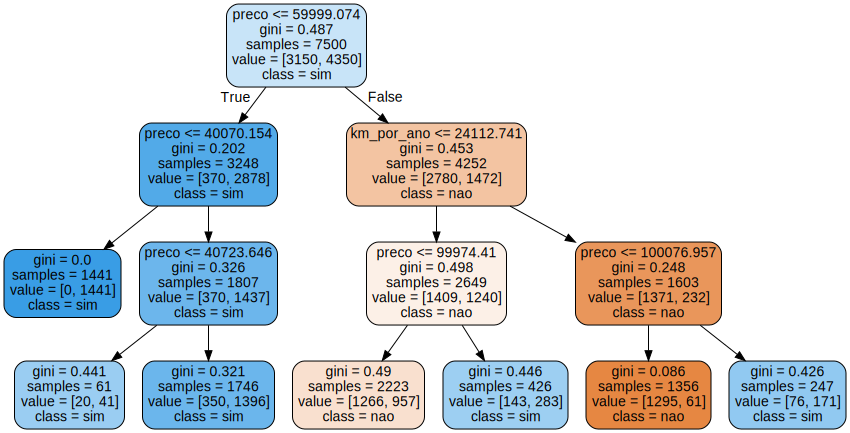

In [73]:
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
import graphviz

modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(raw_treino_x,treino_y)
previsoes = modelo.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

features = x.columns
dot_data = export_graphviz(modelo, out_file=None, filled= True, rounded = True, feature_names = features,
                          class_names=["nao","sim"])
grafico = graphviz.Source(dot_data)
grafico